# Multilayer perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

### Загружаем выборку Diamonds

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')

In [3]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


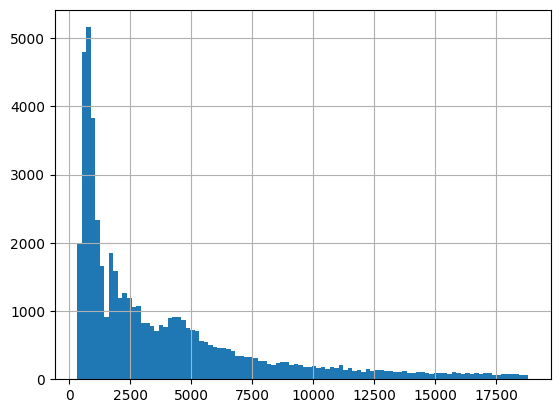

In [4]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [5]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [6]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [7]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [8]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

# Обучаем модель линейной регрессии

In [11]:
reg = LinearRegression().fit(X_train, y_train)

In [12]:
y_pred = reg.predict(X_test)

In [13]:
score = r2_score(y_pred, y_test)
score

0.8977468673125701

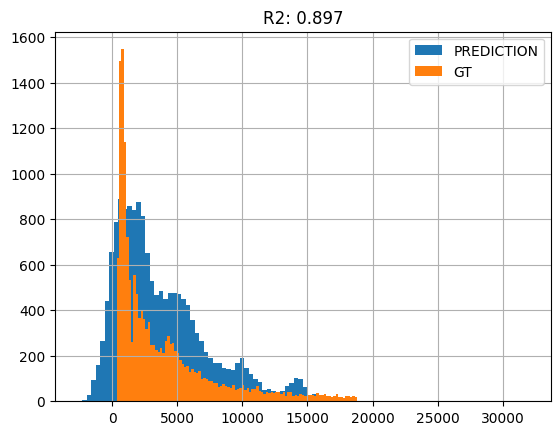

In [14]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

### 1.1 Градиентный спуск для линейной регрессии

In [15]:
class MyLinearRegression():



    def __init__(self,learning_rate = 0.1 ):
        
        self.mu,self.sigma = 0, 0.1
        
        self.weights = np.random.normal(self.mu,self.sigma,(X.shape[1]+1,1)) #W+bias
        self.bias= None  #will be added after model.fit complete

        self.lr = learning_rate
        self.epochs = 10000

    def exact_solution(self, X ,y ):
        return np.linalg.inv(X.T @ X) @ X.T @ y
    
    def grad(self, X,y):
        
        error = X@self.weights-y
        return 2 * X.T@(error) / (X.shape[0]), np.mean(error)
    


    def fit(self, X,y):
        
        x0 = np.ones(shape = (X.shape[0],1)) #this is bias
        X = np.concatenate([X.copy(), x0],axis =1) # add to arr
        
        error = 1 # random digit > than 0
        counter = 0 #if we can't make it under number of epochs
        while (abs(error)>0.001):
            grad_i, error = self.grad(X,y)
            self.weights  -= self.lr * grad_i
            counter+=1
            if counter>=self.epochs:
                break
        print(f"Модель сошлась за {counter} эпох")
        
        self.weights = self.weights[:-1]
        self.bias = self.weights[-1]

    def predict(self,X):
        return X@self.weights + self.bias

    



In [16]:
model_custom = MyLinearRegression()

model_custom.fit(X_train, y_train)




Модель сошлась за 2241 эпох


In [17]:
y_pred_custom = model_custom.predict(X_test)

In [18]:
score_reg = r2_score(y_pred_custom, y_test)
score_reg

-7.276804028031888

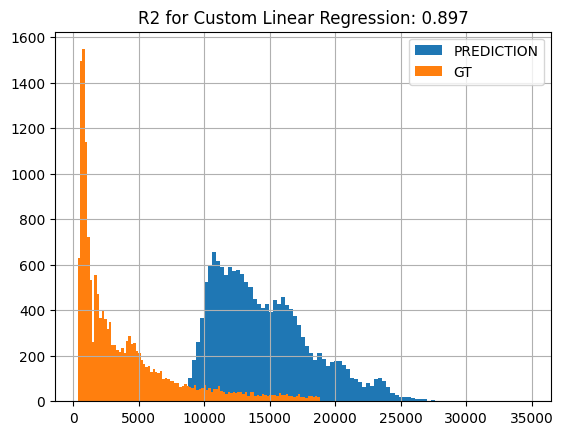

In [19]:
plt.title(f'R2 for Custom Linear Regression: {str(score)[:5]}')
plt.hist(y_pred_custom.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

Вывод: линейная регрессия работает с ~ той же точностью, что и в sklearn

### 1.2 Модель MLP для задачи регрессии

In [20]:
from tqdm import tqdm

In [21]:
class RELU:
    def __init__(self):
        pass

    def forward(self, X):
        
        self.X = X
        return np.maximum(X, 0)

    def backward(self, dLdt):
        
        return (self.X > 0) * dLdt

    def step(self, learning_rate):
        pass

In [22]:
class Linear:
    def __init__(self, weights_in, weights_out):
        self.W = np.random.randn(weights_in, weights_out)*0.001
        self.bias = np.zeros(weights_out)
        
    def forward(self, X):
        self.X = X
        return self.X@self.W + self.bias

    def backward(self, dLdt):
        self.dLdW = self.X.T @ dLdt
        self.dLdb = dLdt.sum(0)
        self.dLdx = dLdt @ self.W.T
        return self.dLdx
    
    def step(self, lr):
        self.W -= lr * self.dLdW
        self.bias -= lr * self.dLdb


In [23]:
class MSE_loss:
    def __init__(self) -> None:
        pass

    def forward(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        # print("self.y_pred,", y_pred.shape)
        self.loss =  np.mean((y_true - y_pred) ** 2) / ((self.y_pred).shape[0])

        return self.loss
    
    def backward(self):
        # print("self.y_true",self.y_true.shape)
        # print("self.y_pred",self.y_pred.shape)
        return -1 * (self.y_true - self.y_pred) / ((self.y_pred).shape[0])

    

In [24]:
class MLPRegressor:
    def __init__(
        self,
        layers,
        loss_func,
        learning_rate=0.01,
        max_iter=20,
        
        
    ):
        self.layers = layers
        self.loss_func=  loss_func
        
        self.lr = learning_rate
        self.max_iter = max_iter
    
    
    def forward(self, X):
    
        y_pred = X
        for i in range(len(self.layers)):
            y_pred = self.layers[i].forward(y_pred)
       
        
        return y_pred
        

    
    def backward(self, dLdx):
         for i in range(len(self.layers))[::-1]:
            dLdx = self.layers[i].backward(dLdx)

    def step(self):
        for i in range(len(self.layers)):
            self.layers[i].step(self.lr)


    def train(self, X, y_true):
        
        
        for epoch in tqdm(range(self.max_iter)):
            
            y_pred = self.forward(X) #пропустили значения forward pass
            # print('y_pred', y_pred.shape)
            self.loss = self.loss_func.forward(y_true, y_pred) #вычислили ошибку
            # print('self.loss', (self.loss))
            dLdx = self.loss_func.backward() #вычислили градиент ошибки
            # print('dLdx', dLdx,dLdx.shape)
            self.backward(dLdx) #вычисляем градиенты, прокидывая градиент ошибки (backward pass)
            self.step()

        print(f"loss on last epoch = {self.loss}")





In [25]:
layers =[Linear(9,20),  RELU(), 
        Linear(20,1)]
model = MLPRegressor(layers=layers, loss_func=MSE_loss(),max_iter=5000, learning_rate=5e-2)


model.train(X_train, y_train)


100%|██████████| 5000/5000 [01:36<00:00, 51.86it/s]

loss on last epoch = 421.7232495135422


# Проверяем модель MLP на выборке Diamonds

In [28]:
y_pred_mlp = model.forward(X_test)

In [29]:
r2_score(y_test, y_pred_mlp)

-0.000211771990885401

In [30]:
r2_score(y_train, model.forward(X_train))

0.0

Вывод можно сделать такой: наша модель MLP близка к константному предсказателю значений. При этом MLP реализован, и даже отрабатывает, и лосс сходится. Наверное,ситуацию может помочь улучшить регуляризация или особая инициализация весов